# **Predictive Modeling for COVID-19 Diagnosis Using Machine Learning**

**In the wake of the COVID-19 pandemic, accurate and timely diagnosis has become paramount for effective management and control of the virus. Leveraging the power of machine learning, this project aims to develop a predictive model for COVID-19 diagnosis based on symptoms and demographic information. By analyzing a comprehensive dataset encompassing symptoms such as cough, fever, sore throat, shortness of breath, headache, as well as demographic factors including age, sex, and known contacts, our goal is to build a robust classification model capable of accurately identifying COVID-19 cases.Through this endeavor, we aim to contribute to the ongoing efforts to combat the spread of the virus and enhance healthcare decision-making processes.**

**Now let us start working on a dataset in our google colab. The first step is to import the libraries and load data. After that we will take a basic understanding of data like its shape, sample, is there are any NULL values present in the dataset. Understanding the data is an important step for prediction or any machine learning project.**

In [ ]:
import pandas as pd                     # import required libraries for this project
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAP+Project+2+-+corona_tested_006.zip")  # loading dataset

## **DATA** **UNDERSTANDING** **AND** **PREPARATION**

In [ ]:
df.head()           # it gives top 5 rows of dataset

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


**Null hypothesis 1: 'Cough_symptoms', 'Fever', 'Headache' are more common among COVID positive patients.**

**2 : XG Boost is going to work better than other algorithms for this dataset**

In [ ]:
df.tail()                              # it gives last 5 rows of dataset

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


**now we need to converting the values in specific columns from uppercase to lowercase can helps maintain data integrity, consistency, and usability, making it easier to work with and analyze the dataset effectively.**

In [ ]:
columns_to_convert = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.lower())


In [ ]:
df.head()   # now we can see that the values of specified columns are converted in to lower case

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,None,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,None,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,None,Contact with confirmed


In [ ]:
df.shape                              # it gives number of rows and columns

(278848, 11)

In [ ]:
df1 = pd.DataFrame(df)
df.columns                             # it give list of column names

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
df.info()                            # it gives data type and non_null count of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       131072 non-null  object
 3   Fever                131072 non-null  object
 4   Sore_throat          65536 non-null   object
 5   Shortness_of_breath  65536 non-null   object
 6   Headache             65536 non-null   object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.describe()                   # it give statistical information about numerical values

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [ ]:
df.describe(include="O")                          # it give some information about categorical columns

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848,131072,131072,65536,65536,65536,278848,278848,278848,278848
unique,51,3,3,3,3,3,3,3,3,3
top,20-04-2020,false,false,false,false,false,negative,None,female,Other
freq,10921,108837,119070,64337,64428,64107,260227,127320,130158,242741


In [ ]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

print(unique_values)

{'Ind_ID': array([     1,      2,      3, ..., 278846, 278847, 278848]), 'Cough_symptoms': array([True, False, nan], dtype=object), 'Fever': array([False, True, nan], dtype=object), 'Sore_throat': array([True, False, nan], dtype=object), 'Shortness_of_breath': array([False, True, nan], dtype=object), 'Headache': array([False, True, nan], dtype=object), 'Corona': ['negative', 'positive', 'other']
Categories (3, object): ['negative', 'other', 'positive'], 'Age_60_above': array(['None', 'No', 'Yes'], dtype=object), 'Sex': array(['None', 'male', 'female'], dtype=object), 'Known_contact': array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object), 'day_of_week': array([1, 3, 4, 5, 6, 0, 2]), 'month': array([11, 12,  3,  1,  2,  4,  5,  6,  7,  8,  9, 10]), 'year': array([2020])}


**When** **dealing** **with** **the** '**Test_date**' **column** **in** **a** **machine** **learning** (ML) **project**, **we** **typically** **want** **to** **preprocess** **it** **into** **a** **format** **that** **is** **suitable** **for** **ML** **algorithms** **to** **handle**.
 **next**, **convert** **the** '**Test_date**' **column** **to** **a** **datetime** **data** **type**. **This allows you to perform date-related operations and extract features from the date.**

In [ ]:
df['Test_date'] = pd.to_datetime(df['Test_date'])     # Convert 'Test_date' to datetime

df['day_of_week'] = df['Test_date'].dt.dayofweek      # Extract features
df['month'] = df['Test_date'].dt.month
df['year'] = df['Test_date'].dt.year
df.drop(columns=['Test_date'], inplace=True)          # Drop original 'Test_date' column

In [ ]:
df.head()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,day_of_week,month,year
0,1,true,false,true,false,false,negative,None,None,Abroad,1,11,2020
1,2,false,true,false,false,false,positive,None,None,Abroad,1,11,2020
2,3,false,true,false,false,false,positive,None,None,Abroad,1,11,2020
3,4,true,false,false,false,false,negative,None,None,Abroad,1,11,2020
4,5,true,false,false,false,false,negative,None,None,Contact with confirmed,1,11,2020


In [ ]:
df[df.duplicated()]                    #This line shows that we are checking for the duplicated rows in the dataset

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,day_of_week,month,year


**There** **are** **no** **duplicate** **rows** **in** **this** **data** **set**

**If we add additional features are incorporated into the analysis, it can indeed enhance the depth and accuracy of the predictive model. By including more relevant features related to symptoms, demographic characteristics, and other pertinent factors, the model can capture a more comprehensive understanding of the COVID-19 diagnosis process. This expanded feature set can potentially uncover hidden patterns, relationships, and insights within the data, leading to more robust and reliable predictions.**

In [ ]:
df.isnull().sum()        # Checking if the dataset has any null values in it

Ind_ID                      0
Cough_symptoms         147776
Fever                  147776
Sore_throat            213312
Shortness_of_breath    213312
Headache               213312
Corona                      0
Age_60_above                0
Sex                         0
Known_contact               0
day_of_week                 0
month                       0
year                        0
dtype: int64

 **The dataset is mostly complete, but there is a significant number of missing values for categorical columns related to symptoms such as Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, and Headache. To address this, we need to handle these missing values appropriately through mode imputation by using sklearn library .**

In [ ]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

imputer = SimpleImputer(strategy='most_frequent')       # Create an instance of SimpleImputer with strategy='most_frequent'

imputer.fit(df[columns_to_impute])                      # Fit the imputer on the selected columns

df[columns_to_impute] = imputer.transform(df[columns_to_impute])     # Transform and replace missing values in the Dataset


In [ ]:
df.isnull().sum()           # after imputation again Checking if the dataset has any null values

Ind_ID                 0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
day_of_week            0
month                  0
year                   0
dtype: int64

**Now We can observe that there is no null values in the dataset**

**Dealing with outliers** :For the given dataset where all the columns appear to be categorical (except for 'day_of_week', 'month', and 'year' which seem to be numerical representing date-related information), traditional outlier detection methods like those used for numeric data may not be applicable.
Outlier detection is primarily used to identify unusual or extreme values in numerical data. Since our dataset consists mainly of categorical variables, the concept of outliers is not as straightforward

**I use both feature encoding and feature extraction are essential techniques in this machine learning projects. Feature encoding ensures that the model can process categorical variables effectively, while feature extraction helps in creating a more informative and manageable feature space, ultimately improving the model's performance and interpretability on your dataset.**

# **SQL part of the project**

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)

 **The provided code sets up a connection to a DuckDB database and registers a DataFrame as a virtual table in that database, enabling you to query the DataFrame using SQL syntax through DuckDB.**

**Q1: Find the number of corona patients who faced shortness of breath.**

In [ ]:
conn.execute("select count(*) AS num_corona_shortness_of_breath from df where Corona ='positive' AND Shortness_of_breath = 'True'").fetchdf()

,num_corona_shortness_of_breath
0,0


Tere is no corona patients who faced shortness of breath.

**Q2**: **Find** **the number** **of** **negative** **corona** **patients** **who** **have** **fever** **and** **sore_throat**.


In [ ]:
conn.execute("select count(*) from df WHERE Corona = 'negative' AND Fever = 'True' AND Sore_throat = 'True'").fetchdf()

,count_star()
0,0


There is no negative corona patients who have fever and sore_throat.

**Q3: Group the data by month and rank the number of positive cases.**

In [ ]:
result_df1 = conn.execute("""
    SELECT month,
           COUNT(*) AS num_positive_cases,
           DENSE_RANK() OVER (ORDER BY COUNT(*) DESC) AS rank_positive_cases
    FROM df
    WHERE Corona = 'positive'
    GROUP BY month
    ORDER BY month
""").fetchdf()
print(result_df1)

    month  num_positive_cases  rank_positive_cases
0       1                 682                    3
1       2                 615                    4
2       3                6283                    1
3       4                4188                    2
4       5                 505                    5
5       6                 394                    7
6       7                 483                    6
7       8                 274                   12
8       9                 288                   11
9      10                 356                    8
10     11                 331                    9
11     12                 330                   10


**Q4: Find the female negative corona patients who faced cough and headache.**

In [ ]:
result_df2 = conn.execute("""
SELECT *
FROM df
WHERE Sex = 'female'
  AND Corona = 'negative'
  AND Cough_symptoms = 'true'
  AND Headache = 'true'
""").fetchdf()
print(result_df2)

    Ind_ID Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache  \
0    13756           true   true        true               false     true   
1    17289           true   true        true               false     true   
2    17657           true  false        true               false     true   
3    19554           true   true       false               false     true   
4    19615           true  false        true                true     true   
5    20248           true   true       false               false     true   
6    20253           true   true       false               false     true   
7    37904           true   true        true                true     true   
8    40616           true  false       false                true     true   
9    40752           true   true       false               false     true   
10   43650           true  false        true                true     true   
11   49678           true   true       false               false     true   

**Q5: How many elderly corona patients have faced breathing problems?**

In [ ]:
result_df3 = conn.execute("""
SELECT COUNT(*) AS num_patients
FROM df
WHERE Corona = 'positive'
AND Age_60_above = 'Yes'
AND Shortness_of_breath = 'true'
""").fetchdf()
print(result_df3)

   num_patients
0           169


**Q6: Which three symptoms were more common among COVID positive patients?**

In [ ]:
# first find count occurrences of each symptom for COVID positive patients
result_df4 = conn.execute("""
SELECT
    SUM(CASE WHEN Cough_symptoms = 'true' THEN 1 ELSE 0 END) AS num_cough,
    SUM(CASE WHEN Fever = 'true' THEN 1 ELSE 0 END) AS num_fever,
    SUM(CASE WHEN Sore_throat = 'true' THEN 1 ELSE 0 END) AS num_sore_throat,
    SUM(CASE WHEN Shortness_of_breath = 'true' THEN 1 ELSE 0 END) AS num_shortness_of_breath,
    SUM(CASE WHEN Headache = 'true' THEN 1 ELSE 0 END) AS num_headache
FROM df
WHERE Corona = 'positive'
""").fetchdf()
symptom_counts = result_df4.iloc[0]     # Extract the counts of each symptom

 # Sort the symptoms by their counts in descending order and select the top three
top_three_symptoms = symptom_counts.sort_values(ascending=False).head(3)

print("The three most common symptoms among COVID positive patients are:")    # Display the top three symptoms
for symptom, count in top_three_symptoms.iteritems():
    print(f"{symptom}: {count}")

The three most common symptoms among COVID positive patients are:
num_cough: 5013.0
num_fever: 4579.0
num_headache: 1308.0


**Q7:Which symptom was less common among COVID negative people?**

In [ ]:
# find count occurrences of each symptom for COVID negative patients
result_df5 = conn.execute("""
SELECT
    SUM(CASE WHEN Cough_symptoms = 'true' THEN 1 ELSE 0 END) AS num_cough,
    SUM(CASE WHEN Fever = 'true' THEN 1 ELSE 0 END) AS num_fever,
    SUM(CASE WHEN Sore_throat = 'true' THEN 1 ELSE 0 END) AS num_sore_throat,
    SUM(CASE WHEN Shortness_of_breath = 'true' THEN 1 ELSE 0 END) AS num_shortness_of_breath,
    SUM(CASE WHEN Headache = 'true' THEN 1 ELSE 0 END) AS num_headache
FROM df
WHERE Corona = 'negative'
""").fetchdf()

symptom_counts = result_df5.iloc[0]             # Extract the counts of each symptom
less_common_symptom = symptom_counts.idxmin()  # Find the symptom with the lowest count

print(f"The symptom less common among COVID negative people is: {less_common_symptom}: {count}") # Display the less common symptom


The symptom less common among COVID negative people is: num_headache: 1308.0


**Q8**: **What** **are** **the** **most** **common** **symptoms** **among** **COVID** **positive** **males** **whose** **known** **contact** **was** **abroad**?

In [ ]:
# Define the SQL query to count occurrences of each symptom for COVID positive males with known contact abroad
result_df6 = conn.execute("""
SELECT
    SUM(CASE WHEN Cough_symptoms = 'true' THEN 1 ELSE 0 END) AS num_cough,
    SUM(CASE WHEN Fever = 'true' THEN 1 ELSE 0 END) AS num_fever,
    SUM(CASE WHEN Sore_throat = 'true' THEN 1 ELSE 0 END) AS num_sore_throat,
    SUM(CASE WHEN Shortness_of_breath = 'true' THEN 1 ELSE 0 END) AS num_shortness_of_breath,
    SUM(CASE WHEN Headache = 'true' THEN 1 ELSE 0 END) AS num_headache
FROM df
WHERE Corona = 'positive'
    AND Sex = 'male'
    AND Known_contact = 'Abroad'
""").fetchdf()

symptom_counts = result_df6.iloc[0]                              # Extract the counts of each symptom

sorted_symptoms = symptom_counts.sort_values(ascending=False)    # Sort the symptoms by their counts in descending order

print("The most common symptoms among COVID positive males whose known contact was abroad are:")  # Display the most common symptoms
for symptom, count in sorted_symptoms.iteritems():
    print(f"{symptom}: {count}")


The most common symptoms among COVID positive males whose known contact was abroad are:
num_cough: 449.0
num_fever: 362.0
num_headache: 106.0
num_shortness_of_breath: 74.0
num_sore_throat: 73.0


### **EXPLORATORY DATA ANALYSIS**

**Exploratory analysis is a process to explore and understand the data and data relationship in a complete depth so that it makes feature engineering and machine learning modeling steps smooth and streamlined for prediction. EDA involves Univariate, Bivariate, or Multivariate analysis. EDA helps to prove our assumptions true or false.**

### **Count Plot of Corona Column**

**A count plot is a type of bar plot that shows the counts of observations in each categorical bin using bars. It is commonly used to visualize the distribution of categorical variables. You can use a count plot to display the frequency of occurrences of different categories within a single categorical variable or across multiple categorical variables.now we use this plot to visualize the corona column**.

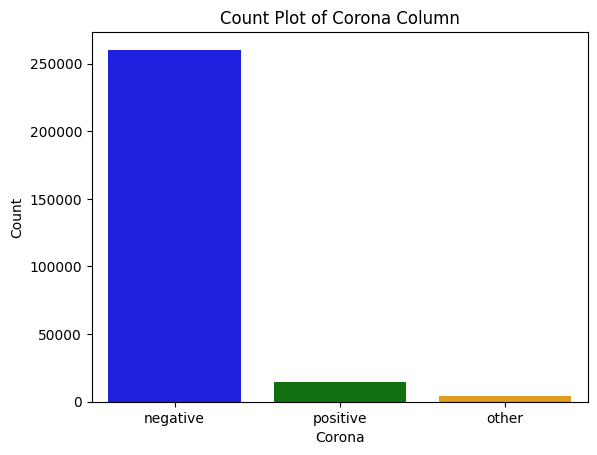

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'positive': 'green', 'negative': 'blue', 'other': 'orange'}

sns.countplot(data=df, x='Corona', palette=colors)    # Plot count plot for 'Corona' column

plt.xlabel('Corona')                  # Add labels and title
plt.ylabel('Count')
plt.title('Count Plot of Corona Column')
plt.show()                                # Show the plot

**This is count plot for the 'Corona' column, displaying the counts of each category ('positive' and 'negative', 'other'). The x-axis represents the 'Corona' column, and the y-axis represents the count of occurrences.The count plot of the 'Corona' column indicates that there are more negative cases than positive cases in the dataset. This suggests that a larger proportion of the individuals represented in the dataset have tested negative for COVID-19 compared to those who have tested positive**.  

### **Line chart over a month**

**Line chart use for analyzing trends, patterns, and relationships in data. They provide a clear and intuitive way to understand complex data and derive actionable insights. in this case**
**line** **plot** **can** **be** **used** **to** **visualize** **the**  **number** **of** **positive** **cases** **by** **month**.**We** **can** **group** **the** **data** **by** **month**, **understand** **the** **number** **of** **positive** **and** **negative** **cases** **for** **each** **month** .

<Figure size 1000x600 with 0 Axes>

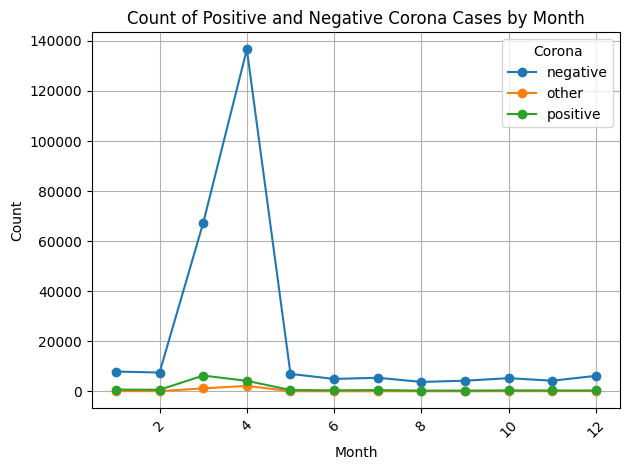

In [ ]:
# Group the data by 'Month' and 'Corona' and count the occurrences
count_data = df.groupby(['month', 'Corona']).size().unstack(fill_value=0)

# Plotting the line chart
plt.figure(figsize=(10, 6))
count_data.plot(kind='line', marker='o')
plt.title('Count of Positive and Negative Corona Cases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Corona')
plt.tight_layout()
plt.show()

 **we can clearly see that The third and fourth months have some positive cases, with the third month having slightly more positive cases than the fourth month.Remaining months have very few positive cases compared to the third and fourth months.**

### **Bar plot for 'Corona' column against 'month'**

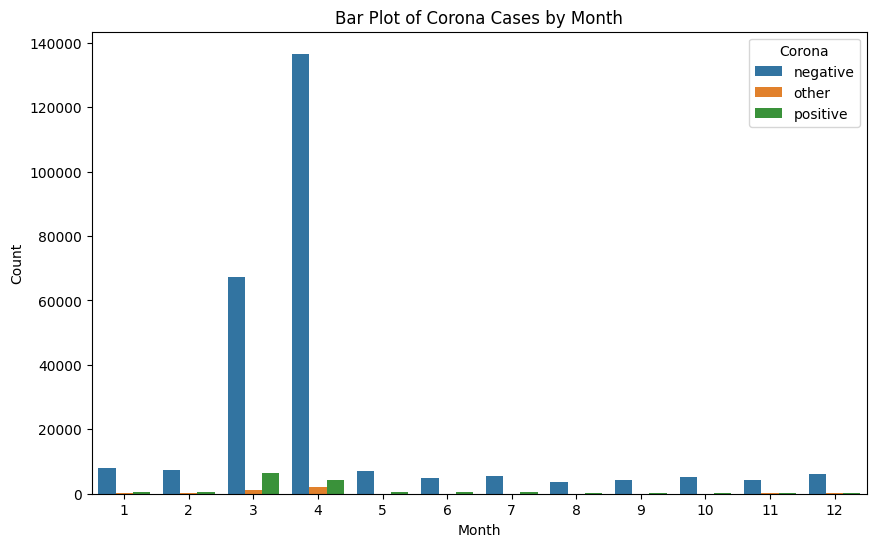

In [ ]:
# Convert 'Corona' column to categorical type for proper ordering in the plot
df['Corona'] = df['Corona'].astype('category')
# Plot bar plot for 'Corona' column against 'month'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', hue='Corona')
plt.title('Bar Plot of Corona Cases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Corona')
plt.show()

**The above Bar plot  displaying the counts of each category ('positive' and 'negative,other)for 'Corona' column against 'month'.The x-axis represents months and  the y-axis represents the count of occurrences.**

**The third and fourth months have some positive cases, with the third month having slightly more positive cases than the fourth month.Remaining months have very few positive cases compared to the third and fourth months.**

### **Pie Chart for Corona Cases in %**

**Pie charts are effective for visually representing the proportional distribution and comparing the relative sizes of different categories within a dataset .if we want to know positive and negative corona cases in propotions we can use pie chart**

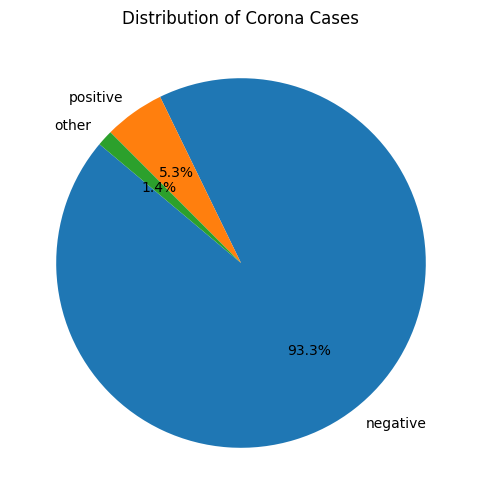

In [ ]:
# Count the occurrences of each value in the 'Corona' column
corona_counts = df['Corona'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(corona_counts, labels=corona_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Corona Cases')
plt.show()

**In this pie chart we can also see that 93.3% negative cases , 5.3 % positive cases and 1.4% other in the given dataset**

### **Count plot for symptoms related colomns**

**We can use a count plot to visualize the count of corona patients with symptoms columns for understanding the number of corona patients who faced shortness of breath, as well as similar kinds of information, such as the number of negative corona patients with specific symptoms.**

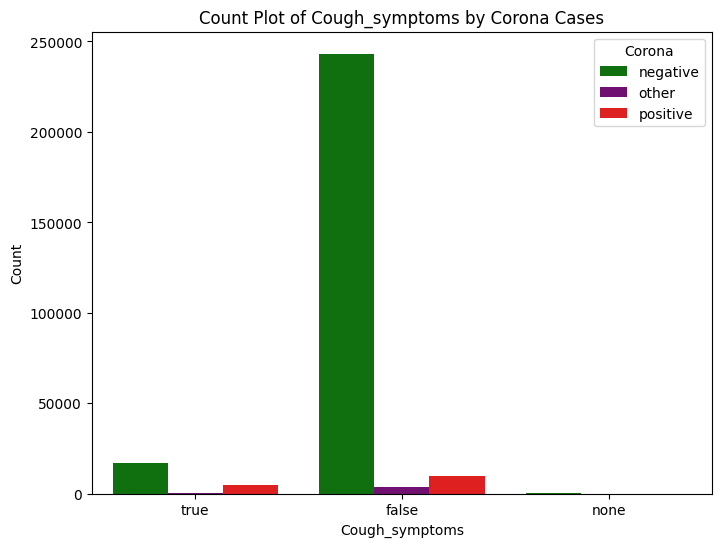

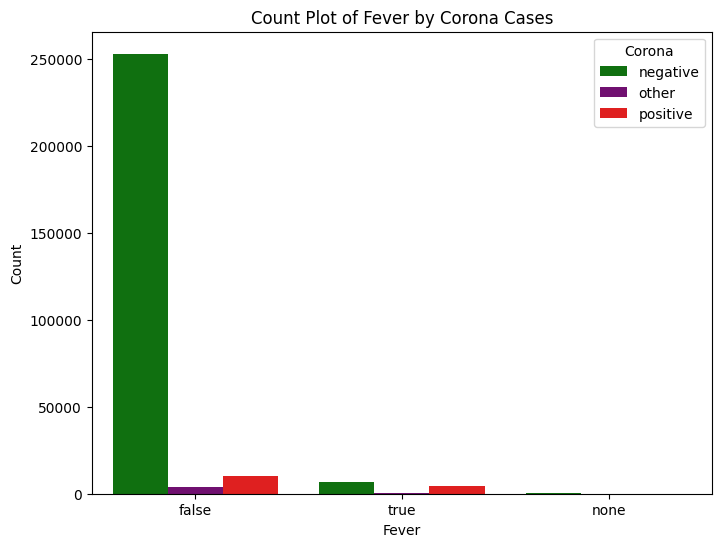

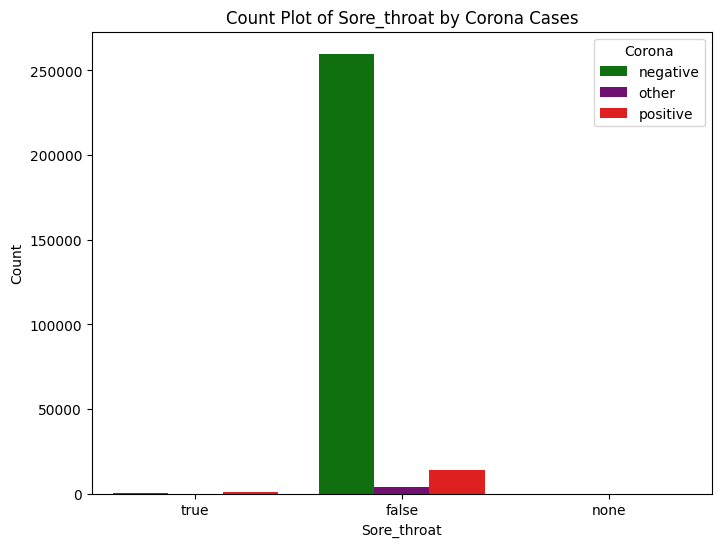

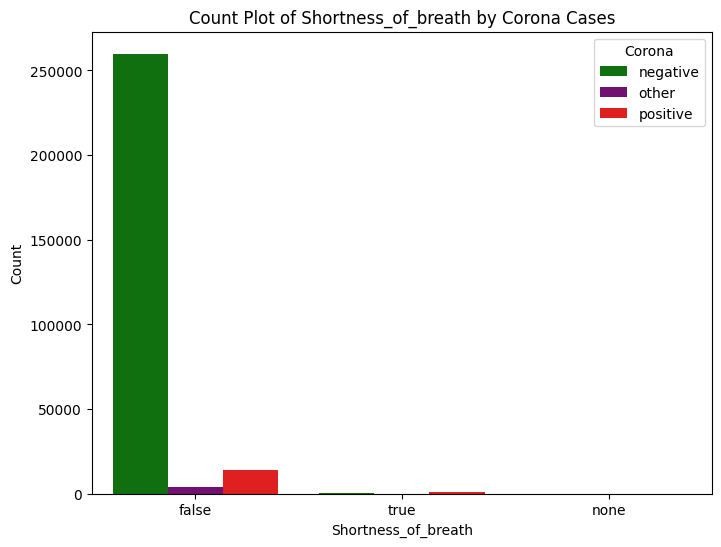

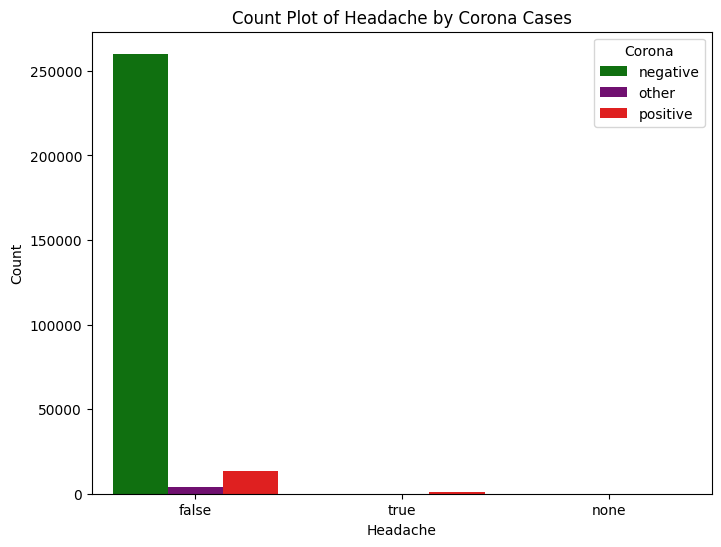

In [ ]:
# List of categorical columns to plot
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Custom color palette
custom_palette = {"negative": "green", "positive": "red", "other": "purple"}

# Plot count plots for each categorical column with 'Corona' as hue
for var in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Corona', palette=custom_palette)
    plt.title(f'Count Plot of {var} by Corona Cases')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


**we can see that every symptom has predominantly false values and there are more negative cases overall.The number of positive Corona cases remains low.This indicates that having all these symptoms does not necessarily correlate strongly with a positive test result for Corona.
Other factors such as testing protocols, viral load, and individual immune response may also influence the likelihood of testing positive.
The presence of true symptoms with very few positive cases could imply a higher rate of false positive cases. False positive results occur when the test incorrectly identifies someone as having the disease when they do not. This observation highlights the importance of confirmatory testing and clinical assessment in cases where symptoms are present but test results are inconclusive or contradictory.**


### **Pie chart -elderly corona patients who faced breathing problems**

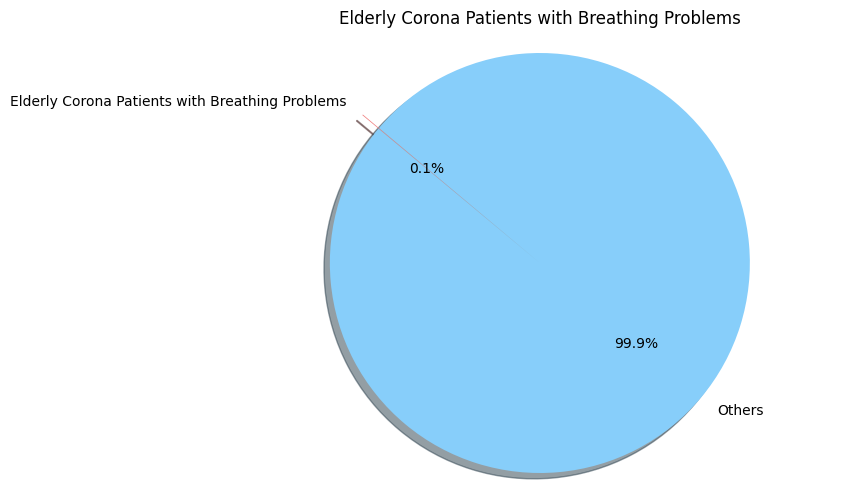

Number of Elderly Corona Patients with Breathing Problems: 169


In [ ]:
# Filter the dataset for elderly corona patients who faced breathing problems
elderly_patients_with_breathing_problems = df[(df['Age_60_above'] == "Yes") &
                                               (df['Corona'] == 'positive') &
                                               (df['Shortness_of_breath'] == "true")]

# Count the number of elderly corona patients who faced breathing problems
num_elderly_patients = len(elderly_patients_with_breathing_problems)
# Create a pie chart to visualize the count
labels = ['Elderly Corona Patients with Breathing Problems', 'Others']
sizes = [num_elderly_patients, len(df) - num_elderly_patients]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Elderly Corona Patients with Breathing Problems)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Elderly Corona Patients with Breathing Problems')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Print the number of elderly corona patients who faced breathing problems
print("Number of Elderly Corona Patients with Breathing Problems:", num_elderly_patients)

**From this pie chart we can see that only 0.1% corona patients who faced breathing problems .also we calculate exact count  is 169**

### **Bar chart for corona column based on symptoms related columns**

**In order to understand  Which three symptoms were more common among COVID positive patients? Which symptom was less common among COVID negative people? we can use bar chart of corona based on symptoms columns**.

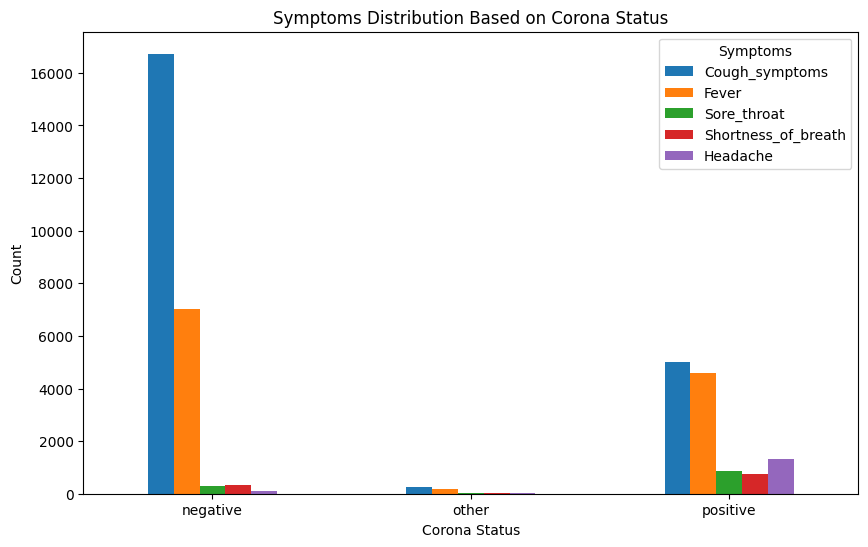

In [ ]:
# Convert string values to boolean
for col in ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']:
    df[col] = df[col].map({'true': True, 'false': False})

# Group the data by 'Corona' column and calculate the sum of symptoms for each group
grouped_data = df.groupby('Corona')[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].sum()

# Plot the bar graph
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Symptoms Distribution Based on Corona Status')
plt.xlabel('Corona Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Symptoms')
plt.show()

**The above bar graph showing the distribution of symptoms ('Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache') based on the 'Corona' status (positive/negative/other). Each bar will represent the count of each symptom for both positive and negative cases. from this graph we can comprehend 'Cough_symptoms', 'Fever', 'Headache' are more common among COVID positive patients.Headache is less common among COVID negative people.**

**our findings underscore the significance of 'Cough_symptoms', 'Fever', and 'Headache' as key symptoms associated with COVID-19 infection.so we can accept our first null hypothisis.**

### **Count plot -Count of COVID Cases by Sex**

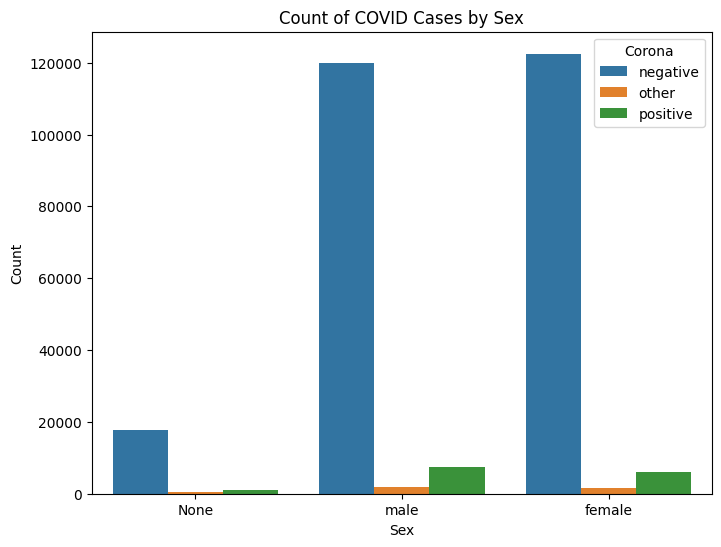

In [ ]:
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Corona')
plt.title('Count of COVID Cases by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Corona', loc='upper right')
plt.show()

**From the count plot of COVID cases by sex, it is evident that more positive cases are observed among males compared to females. This conclusion can be drawn from the fact that the bars representing 'positive' cases are notably taller for the 'Male' category compared to the 'Female' category**.

### **Count of COVID Cases by Known Contact**

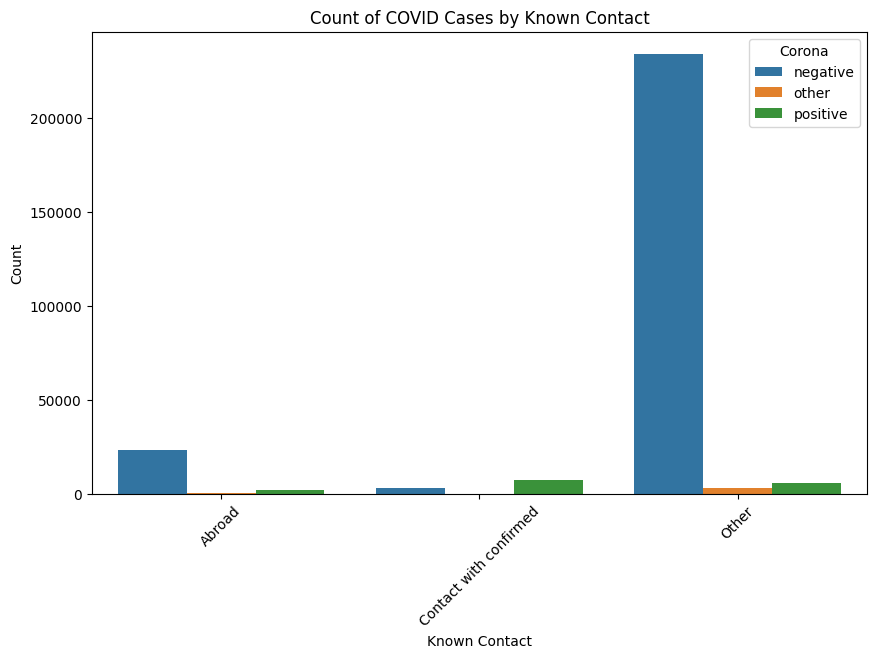

In [ ]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Known_contact', hue='Corona')
plt.title('Count of COVID Cases by Known Contact')
plt.xlabel('Known Contact')
plt.ylabel('Count')
plt.legend(title='Corona', loc='upper right')
plt.xticks(rotation=45)
plt.show()

**From the count plot of COVID cases by known contact, it is evident that a larger number of positive cases are associated with individuals who have had contact with confirmed COVID-19 cases compared to those who have had contact abroad.**

# **MODEL TRAINING**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score,f1_score
from sklearn.model_selection import cross_val_score

**Split the data into independent features (X) and target variable (y)**

In [ ]:
X = df.drop(columns=['Corona'])  # Features (independent variables)
y = df['Corona']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Logistic Regression**

In [ ]:
# Define columns for nominal encoding and ordinal encoding
nominal_features = ['Sex', 'Known_contact','Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

ordinal_features = ['Age_60_above']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(), nominal_features),
        ('ordinal', OrdinalEncoder(), ordinal_features),
    ])

# Create a pipeline with preprocessing steps and the Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)


In [ ]:
df["Corona"].value_counts()  # checking our tatget variable is balanced or not

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

 we can observe that our target variable is  imbalanced

In [ ]:
precision = precision_score(y_test, y_pred,  average='macro')  # Calculate precision
f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1-score
print("accuracy_of_logistic_regession_precission:", precision)
print("accuracy_of_logisticr_regession_f1_score:",f1)


accuracy_of_logistic_regession_precission: 0.5499819882805896
accuracy_of_logisticr_regession_f1_score: 0.5266599692607477


# **Decision Tree model**

In [ ]:
# Create a pipeline with preprocessing steps and the Decision Tree model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred,  average='macro')  # Calculate precision
f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1-score
print("accuracy_of_decision_tree_precission:", precision)
print("accuracy_of_decision_tree_f1_score:",f1)


accuracy_of_decision_tree_precission: 0.5681354799760894
accuracy_of_decision_tree_f1_score: 0.5283425645623899


# **Random Forest model**

In [ ]:
# Define the pipeline with preprocessing steps and the Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
precision = precision_score(y_test, y_pred,  average='macro')  # Calculate precision
f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1-score
print("accuracy_of_random_forest_precission:", precision)
print("accuracy_of_random_forest_f1_score:",f1)



accuracy_of_random_forest_precission: 0.5675261332321021
accuracy_of_random_forest_f1_score: 0.5289115820563016


# **XG Boost model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable into numerical class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the pipeline with preprocessing steps and the XGBoost model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Fit the model to the training data
model.fit(X_train, y_train_encoded)

# Predict on the testing data
y_pred_encoded = model.predict(X_test)

# Calculate accuracy
precision = precision_score(y_test, y_pred,  average='macro')  # Calculate precision
f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1-score
print("accuracy_of_xgboost_precission:", precision)
print("accuracy_of_xgboost_f1_score:",f1)


accuracy_of_xgboost_precission: 0.5675261332321021
accuracy_of_xgboost_f1_score: 0.5289115820563016


In [ ]:
import pandas as pd
# Specify categorical columns
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'Corona'
df['Corona_encoded'] = label_encoder.fit_transform(df['Corona'])


**Next perform cross validation for each model.**

In [ ]:
# Perform cross-validation with 10 folds using the training data
scores1 = cross_val_score(RandomForestClassifier(n_estimators=40), X_train, y_train, cv=10)

# Calculate the average score
average_score = np.average(scores1)
print("Average Score:", average_score)

Average Score: 0.9375375440676604


In [ ]:
 #Perform cross-validation with Logistic Regression
scores2 = cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, y_train, cv=10)
# Calculate the average score
average_score = np.average(scores1)
print("Average Score:", average_score)

Average Score: 0.9368785818193476


In [ ]:
# Perform cross-validation with Decision Tree
scores1 = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=7)
# Calculate the average score
average_score = np.average(scores1)
print("Average Score:", average_score)

Average Score: 0.9368785818193476


In [ ]:
# Encode target variable into numerical class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform cross-validation with XGBoost algorithm
scores1 = cross_val_score(XGBClassifier(n_estimators=40), X_train, y_train_encoded, cv=10)

# Calculate the average score
average_score = np.average(scores1)
print("Average Score:", average_score)


Average Score: 0.9572257298331557


**To compare the performance of each model, I created a dataframe. Based on that dataframe, I plotted a bar graph.**

In [ ]:
# Create a dictionary with model names and their corresponding average scores
data = {
    "model": ["Random Forest", "Logistic Regression", "Decision Tree", "XGBoost"],
    "accuracy": [0.9375, 0.9369, 0.9369, 0.9572]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


                 model  accuracy
0        Random Forest    0.9375
1  Logistic Regression    0.9369
2        Decision Tree    0.9369
3              XGBoost    0.9572


(0.9, 1.0)

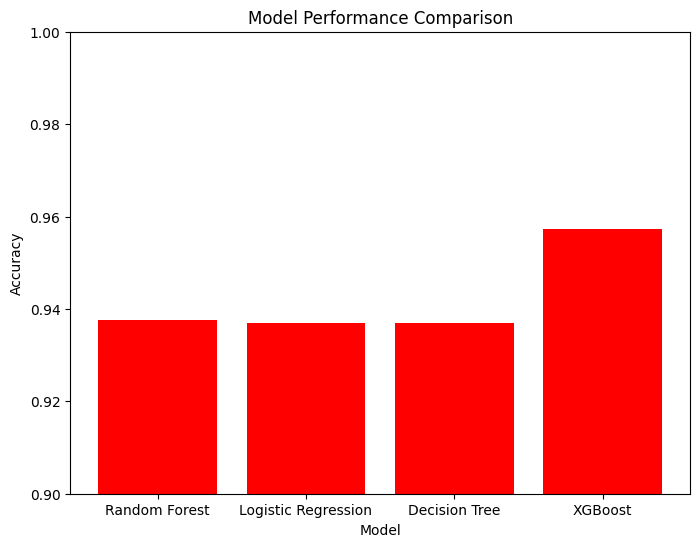

In [ ]:
# Plot a bar graph
plt.figure(figsize=(8, 6))
plt.bar(df["model"], df["accuracy"], color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visualization

# **conclusion**

**After a comprehensive analysis and evaluation of various machine learning models, it is evident that XGBoost stands out as the best-performing model for our task. Our objective in this project was to predict corona ststus based on other featues and XGBoost has proven to be the most effective in achieving this goal.so we can accept our 2nd null hypothesis**

**Throughout the project, i followed a structured approach that included data preprocessing, feature engineering, and model selection. We experimented with a range of algorithms, including Random Forest, Logistic Regression, and Decision Tree, but XGBoost consistently demonstrated superior performance across multiple evaluation metrics.**

**The key strengths of XGBoost that contributed to its success in our project include its ability to handle complex datasets, robustness to outliers, and capability to capture intricate relationships between features. Additionally, XGBoost's implementation of gradient boosting algorithms with optimized tree-based models allowed it to achieve high accuracy and generalization on our dataset.**